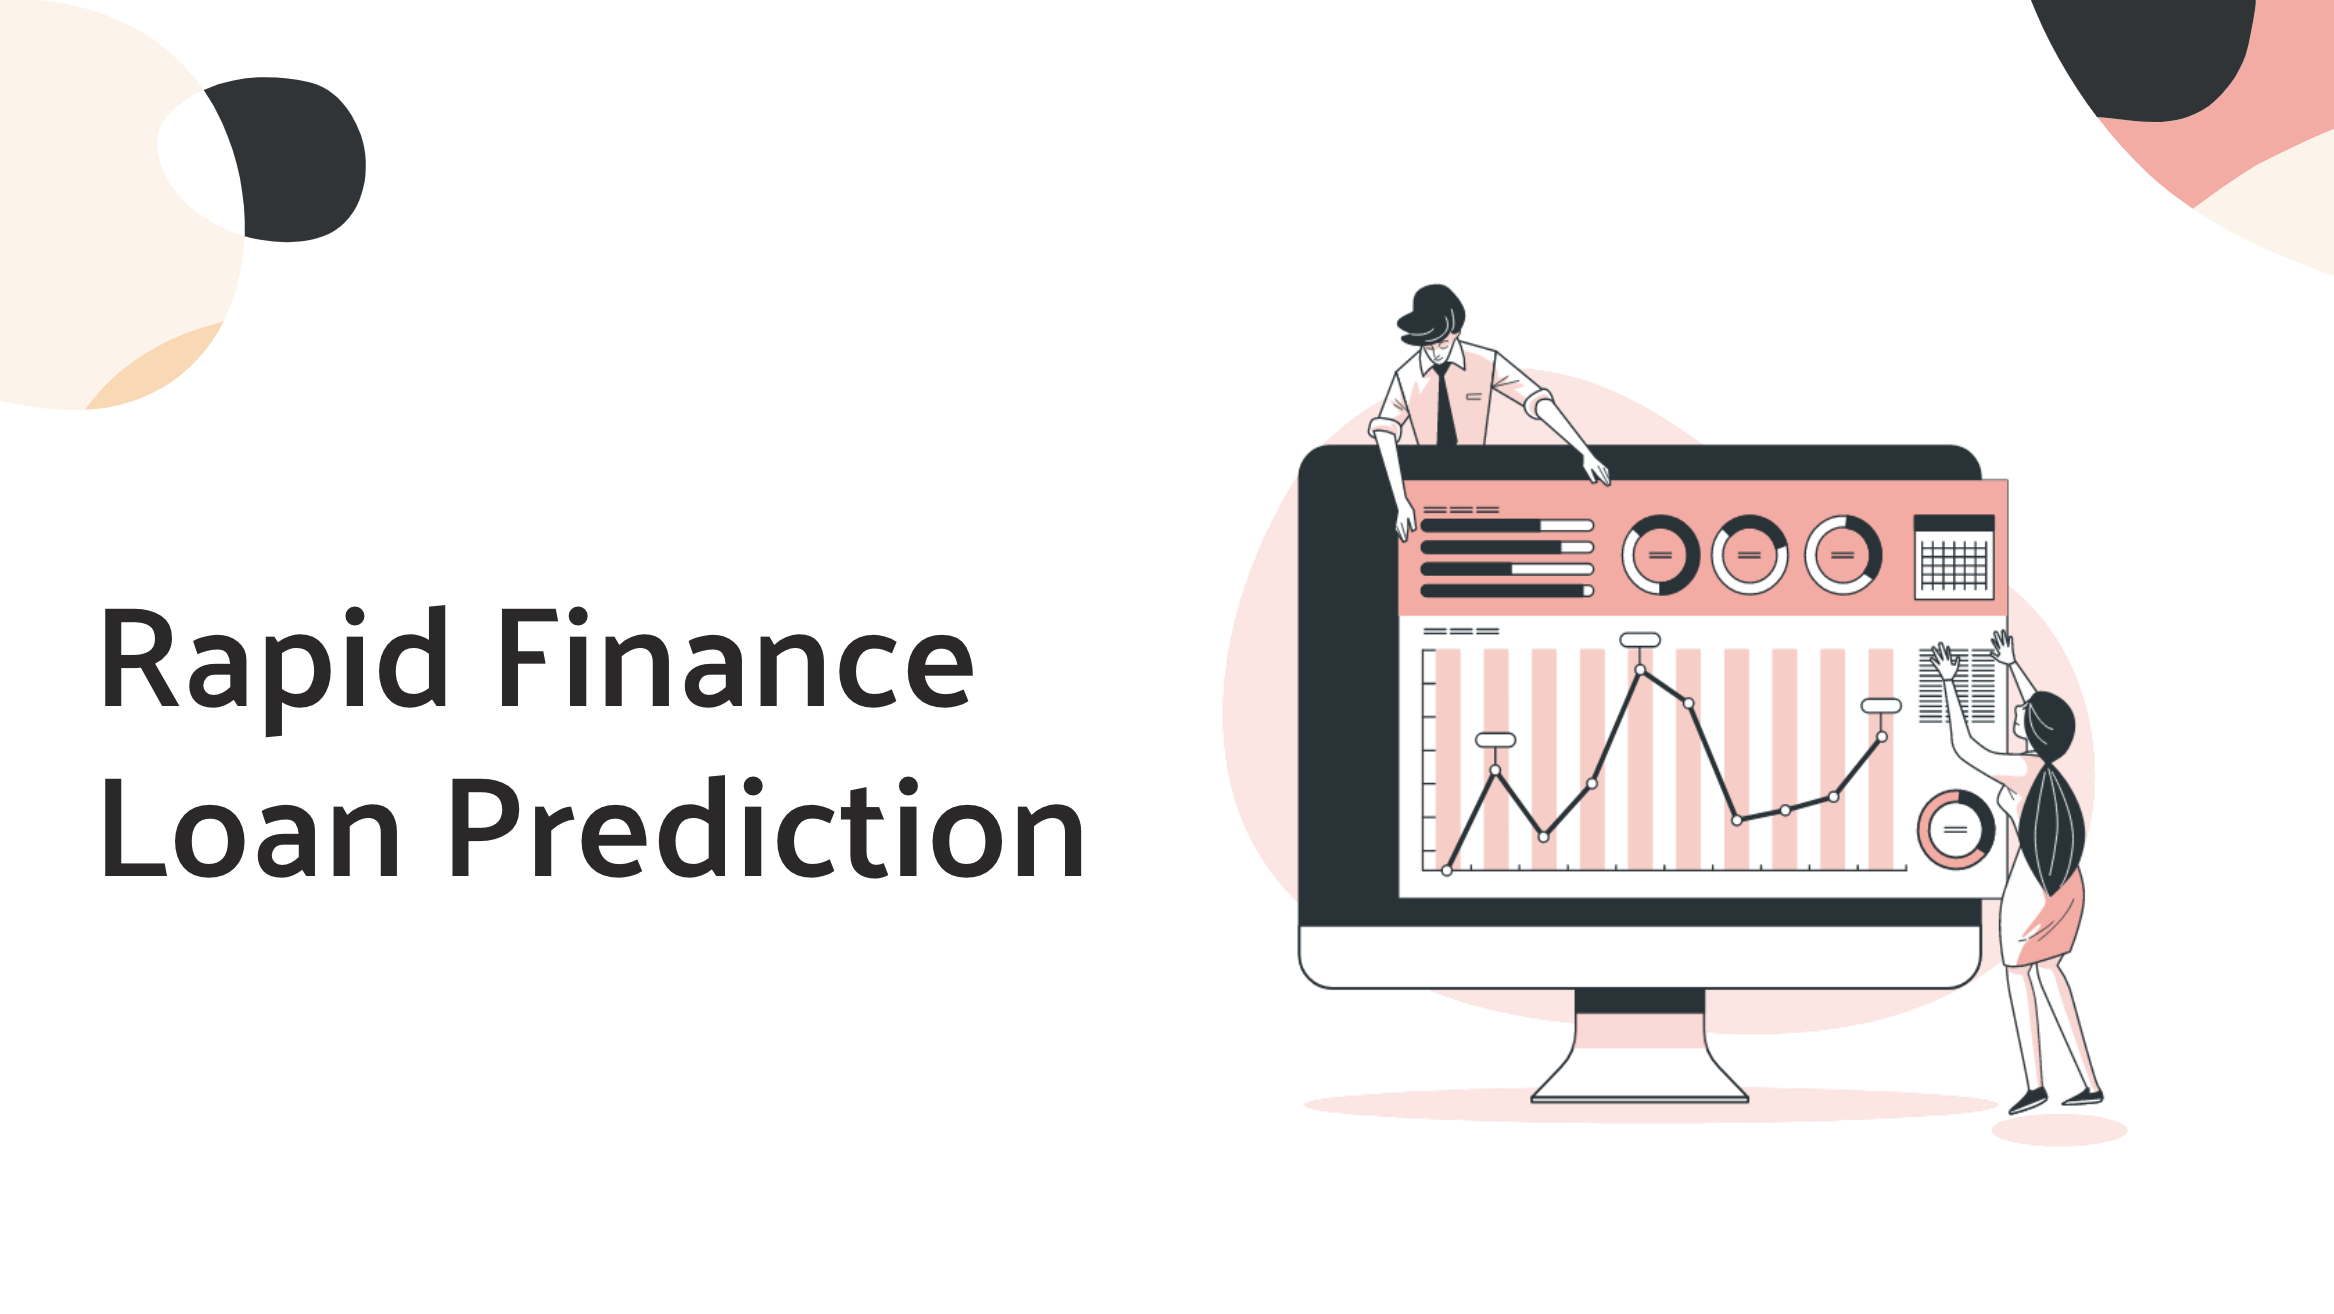

#**INTRODUCTION**



Rapid Finance handles all types of house loans. They have a presence in all metropolitan, semi-urban, and rural regions. The customer initially applies for a house loan through ICAM - a standardized application, following which the firm verifies the customer's loan eligibility manually. Because of the unpredicted growth that the business experienced last quarter, there is a shortage of staff who can go through the documents and come up with a verdict on the approval. The company wishes to automate the loan eligibility procedure (in real-time) based on the information supplied by the applicant. Not only will automation of the loan approval help the company reduce its expenses, but it will also enhance the scalability of the business in the longevity of their procedures. 

This is a classic supervised classification problem, a task in which we must predict whether or not a loan will be approved. The data set we will be using could be found here: https://www.kaggle.com/datasets/altruistdelhite04/loan-prediction-problem-dataset


#**DATA SET DESCRIPTION**

There is a total of 614 rows and 13 columns in our data set of which 8 are categorical variables, 4 continuous, and 1 unique loan ID identifier. 

The dataset attributes are listed below along with their descriptions. 





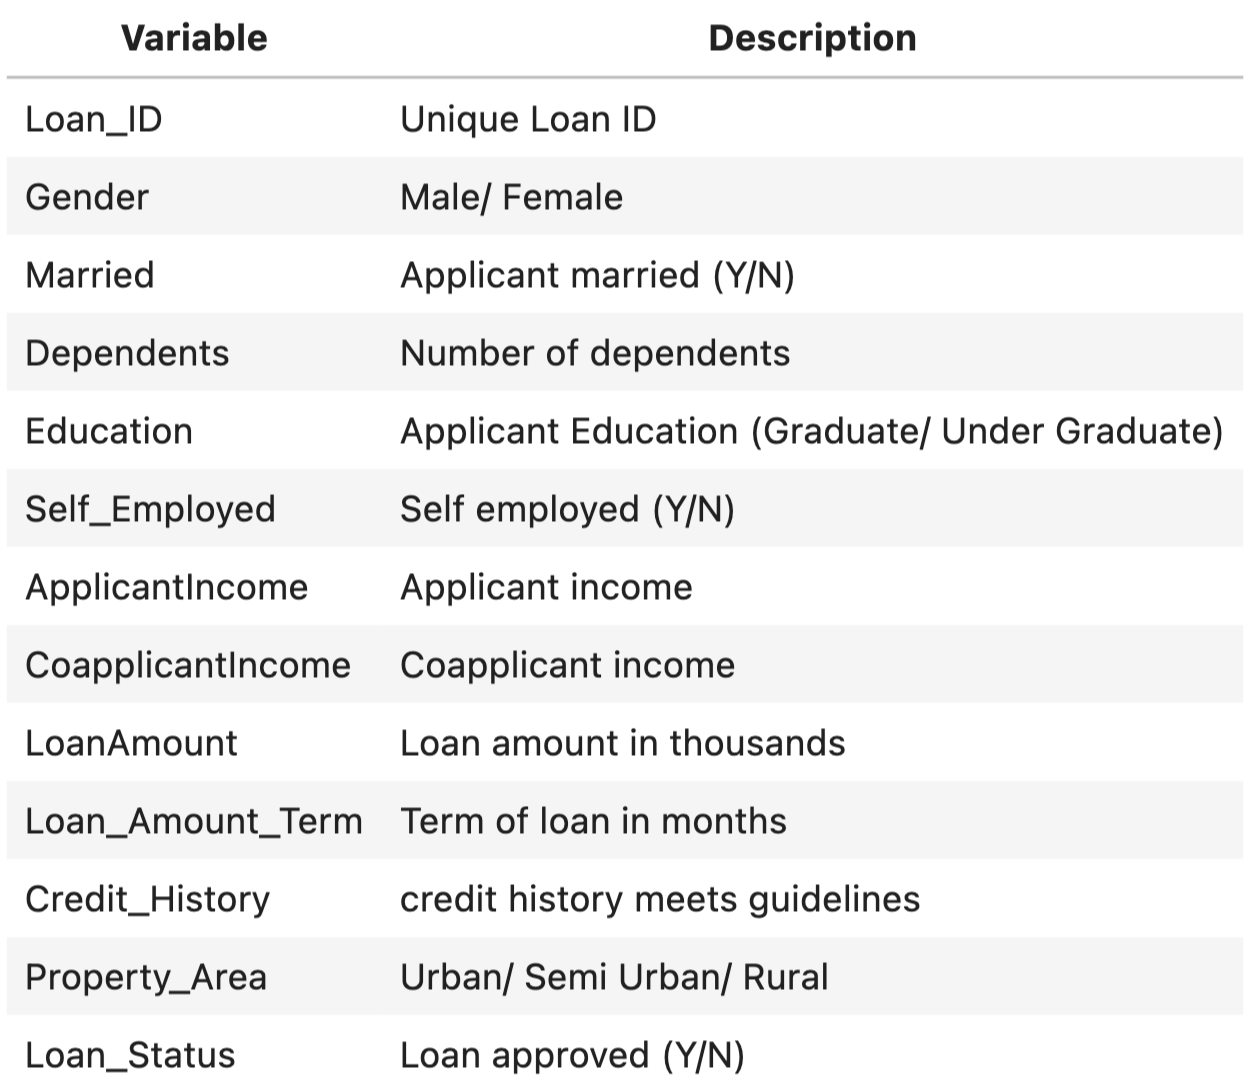

#**OBJECTIVE**

The purpose of the following analysis is to predict whether an applicant is approved for a loan provided the required information. 

For this we will be looking at the following machine learning models: 



---



-   Logistic Regression

---


-   K-Nearest Neighbour (KNN)


---


-   Support Vector Machine (SVM)


---


-   Decision Tree


---


-   Random Forest


---


-   Gradient Boost


---

#**IMPORT MODULES**

In [ ]:
import os # paths to file
import scipy # scientific computing
import warnings # warning filter
import numpy as np # linear algebra
import pandas as pd # data processing
import missingno as mso # visualize the missing data

# ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# relevant ML libraries
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# required ML models
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# default theme
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# warning handle
warnings.filterwarnings("ignore")

#**LOADING THE DATA SET**

In [ ]:
df = pd.read_csv('/content/Rapid_Finance_Train.csv')

In [ ]:
df.shape

(614, 13)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#**EXPLORATORY ANALYSIS**



## Categorical Variable Split by Loan Status:



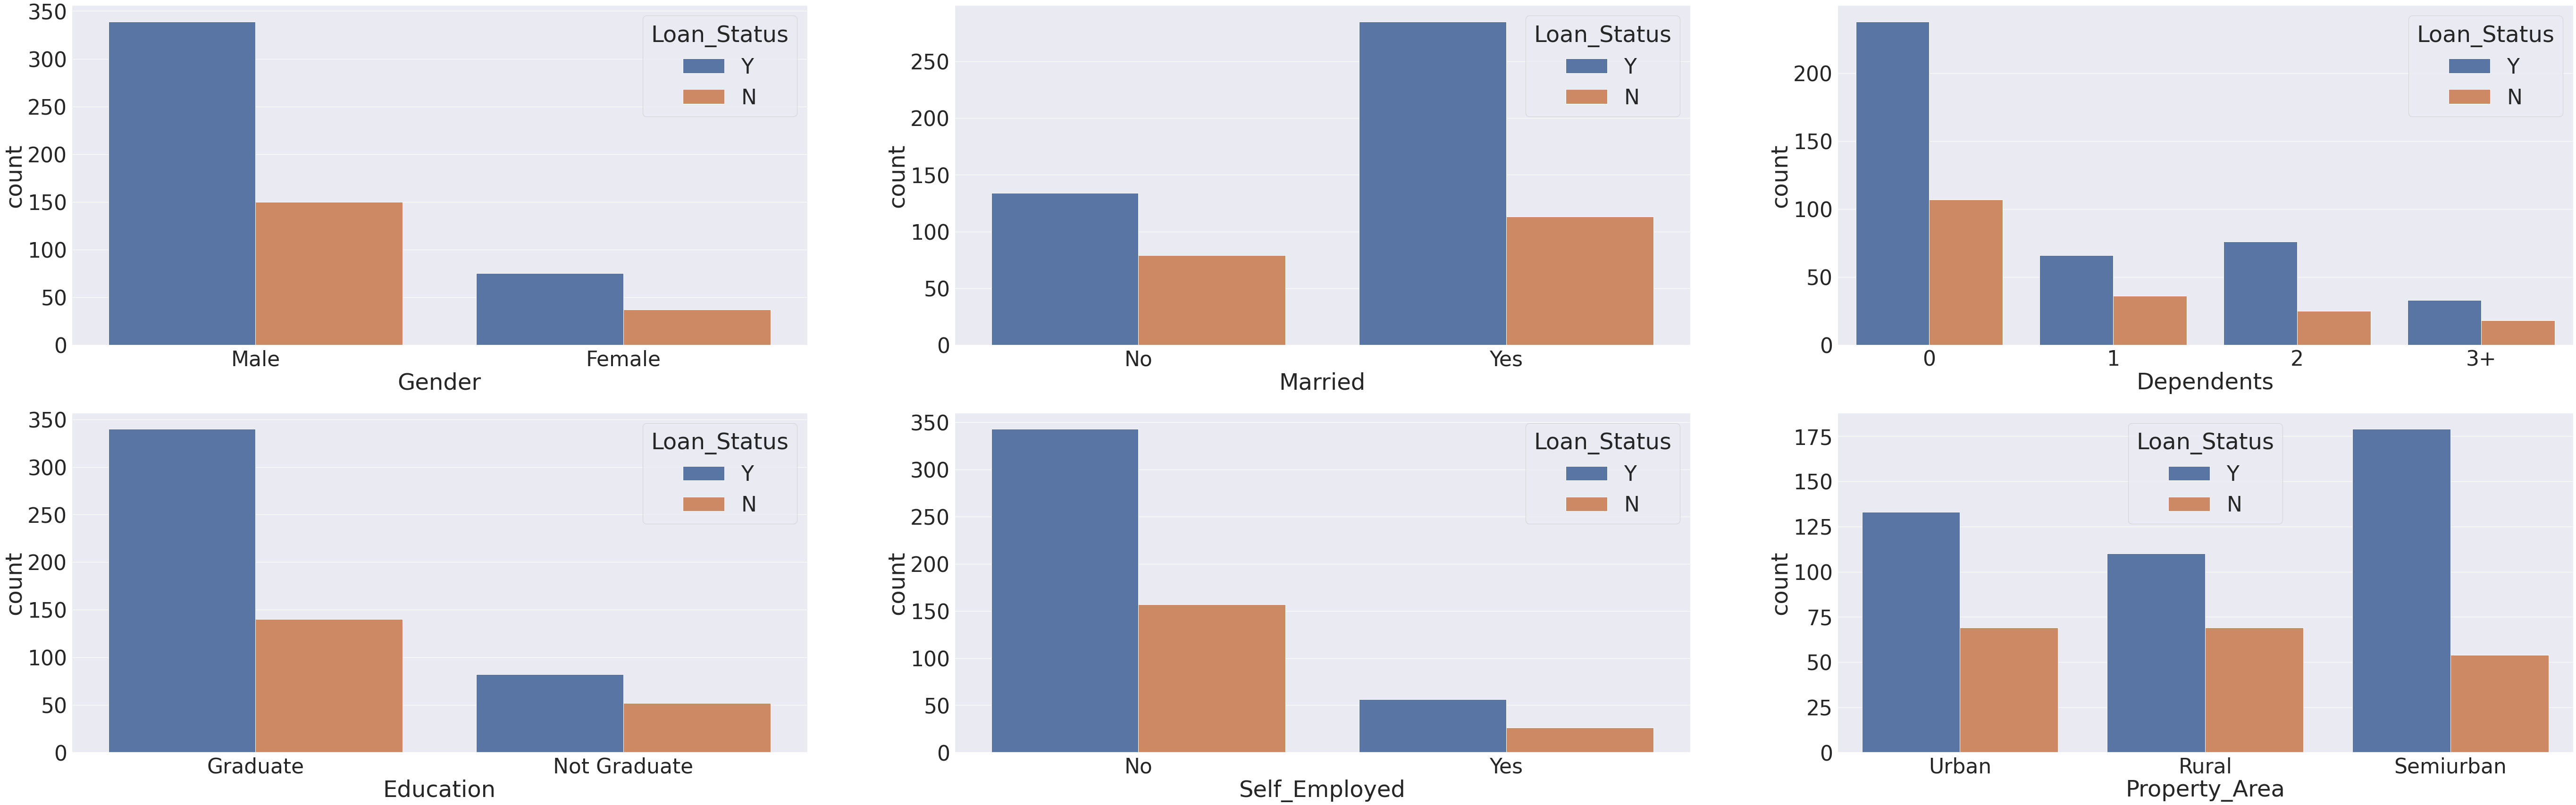

In [ ]:
plt.figure(figsize = (95, 45))
sns.set(font_scale = 4)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])
plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])
plt.subplot(333)
sns.countplot(df['Dependents'],hue=df['Loan_Status'])
plt.subplot(334)
sns.countplot(df['Education'],hue=df['Loan_Status'])
plt.subplot(335)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])
plt.subplot(336)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

([<matplotlib.patches.Wedge at 0x7f3ef8f7e210>,
 [Text(-0.8825844093554915, 0.6565399914419672, 'Male Applicants'),
  Text(0.8369945960283519, -0.7137506891200429, 'Female Applicants'),
  Text(1.0975675014134119, -0.07311347236399363, 'Null (Missing Data)')],
 [Text(-0.481409677830268, 0.35811272260470933, '79.642'),
  Text(0.45654250692455556, -0.3893185577018416, '18.241'),
  Text(0.5986731825891336, -0.03988007583490561, '2.117')])

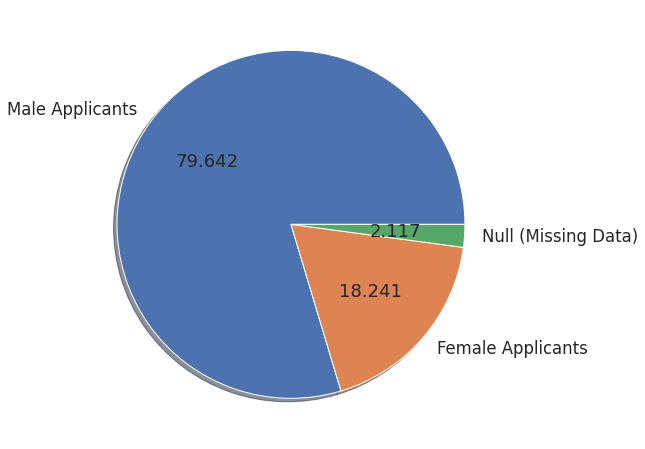

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Gender'].value_counts(dropna=False),startangle=0,autopct='%.3f',labels=['Male Applicants','Female Applicants','Null (Missing Data)'],shadow=True)

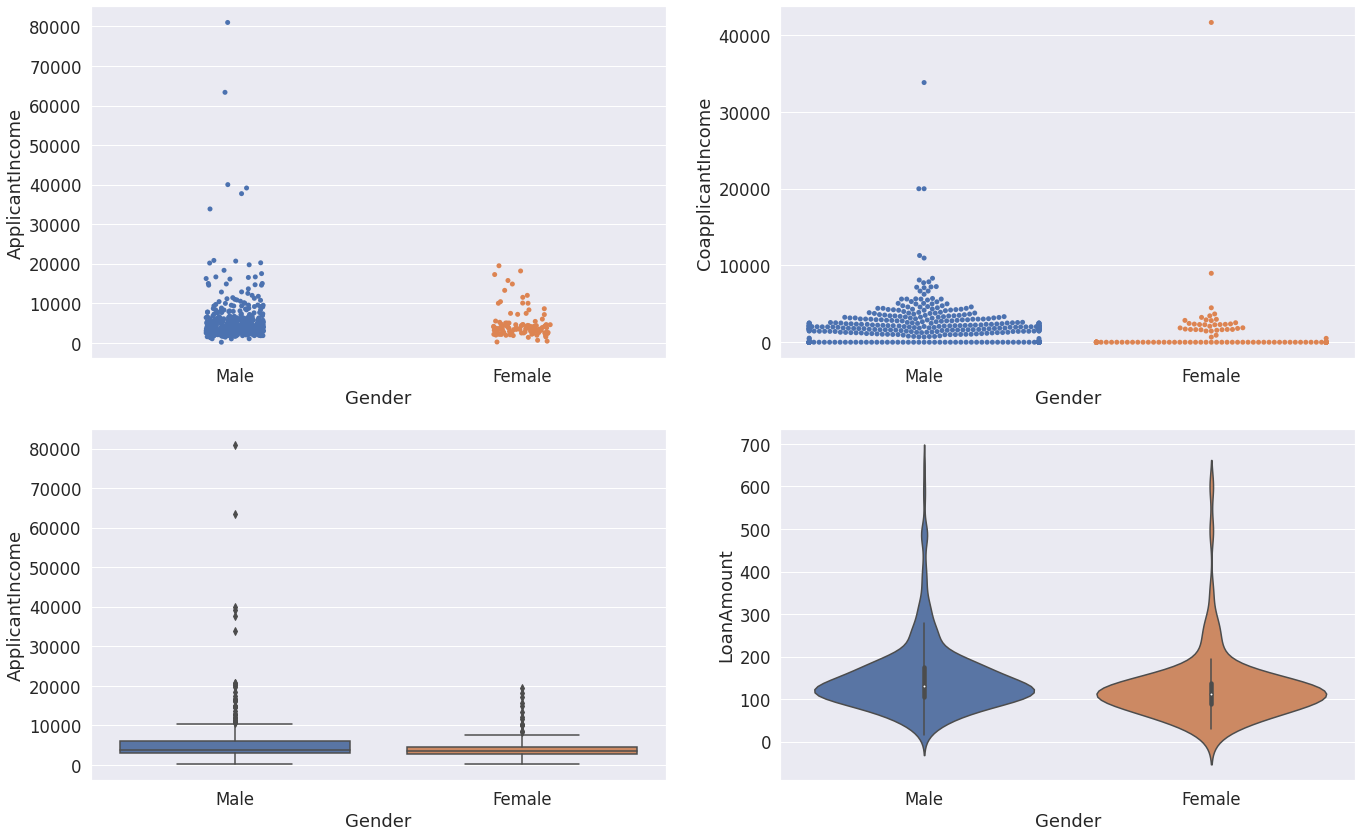

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Gender'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Gender'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Gender'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Gender'],y=df['LoanAmount'])

([<matplotlib.patches.Wedge at 0x7f3ef8f9ee90>,
 [Text(-0.49386527900841193, 0.982902378769094, 'Married Applicants'),
  Text(0.47872021789492547, -0.990367079914632, 'Non-Married Applicants'),
  Text(1.0998704095268506, -0.016884378793376967, 'Null (Missing Data)')],
 [Text(-0.26938106127731554, 0.5361285702376876, '64.821'),
  Text(0.2611201188517775, -0.5402002254079811, '34.691'),
  Text(0.599929314287373, -0.009209661160023799, '0.489')])

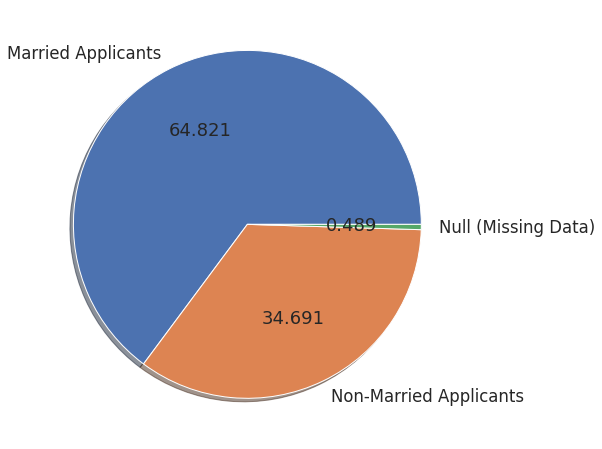

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Married'].value_counts(dropna=False),startangle=0,autopct='%.3f',labels=['Married Applicants','Non-Married Applicants','Null (Missing Data)'],shadow=True)

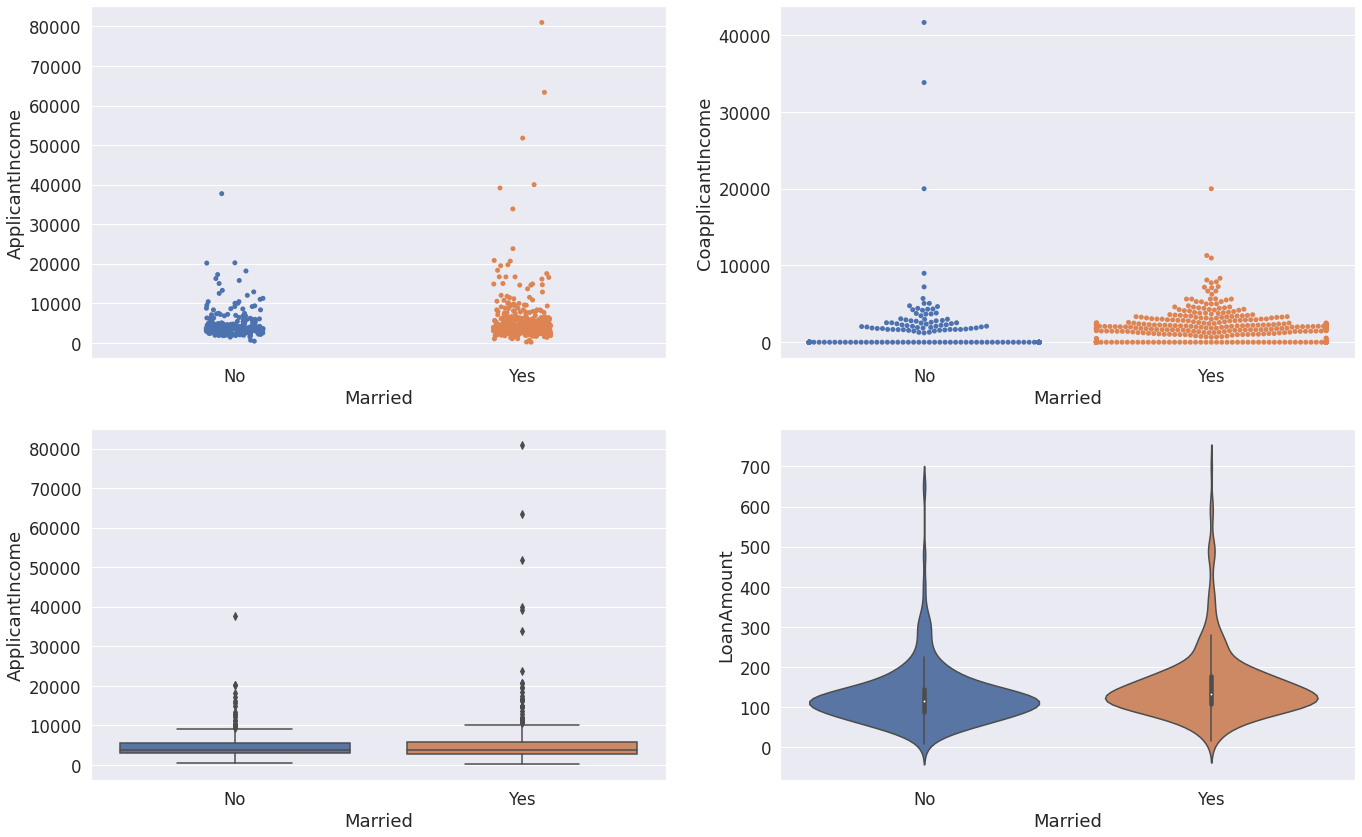

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Married'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Married'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Married'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Married'],y=df['LoanAmount'])

([<matplotlib.patches.Wedge at 0x7f3ef8d7a650>,
 [Text(-0.21252885084743736, 1.079273592541515, 'Applicants with 0 dependents'),
  Text(-0.6744646685855555, -0.8689634116749547, 'Applicants with 1 dependents'),
  Text(0.4066108894187732, -1.0220898123971662, 'Applicants wih 2 dependents'),
  Text(1.0068740399709317, -0.44294996064184816, 'Applicants with 3+ dependents'),
  Text(1.096761851605141, -0.08434121687326226, 'Null (Missing Data)')],
 [Text(-0.11592482773496582, 0.5886946868408263, '56.189'),
  Text(-0.3678898192284848, -0.47398004273179345, '16.612'),
  Text(0.22178775786478536, -0.5575035340348179, '16.450'),
  Text(0.5492040218023263, -0.24160906944100807, '8.306'),
  Text(0.5982337372391677, -0.0460043001126885, '2.443')])

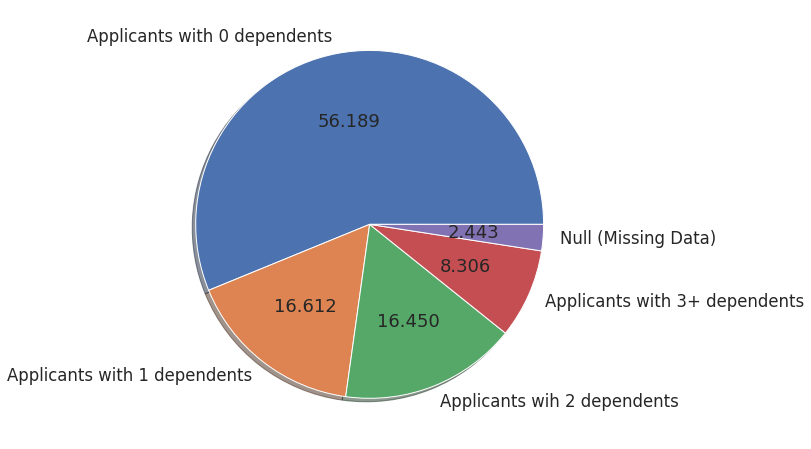

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Dependents'].value_counts(dropna=False),startangle=0,autopct='%.3f',
        labels=['Applicants with 0 dependents','Applicants with 1 dependents','Applicants wih 2 dependents','Applicants with 3+ dependents','Null (Missing Data)'],shadow=True)

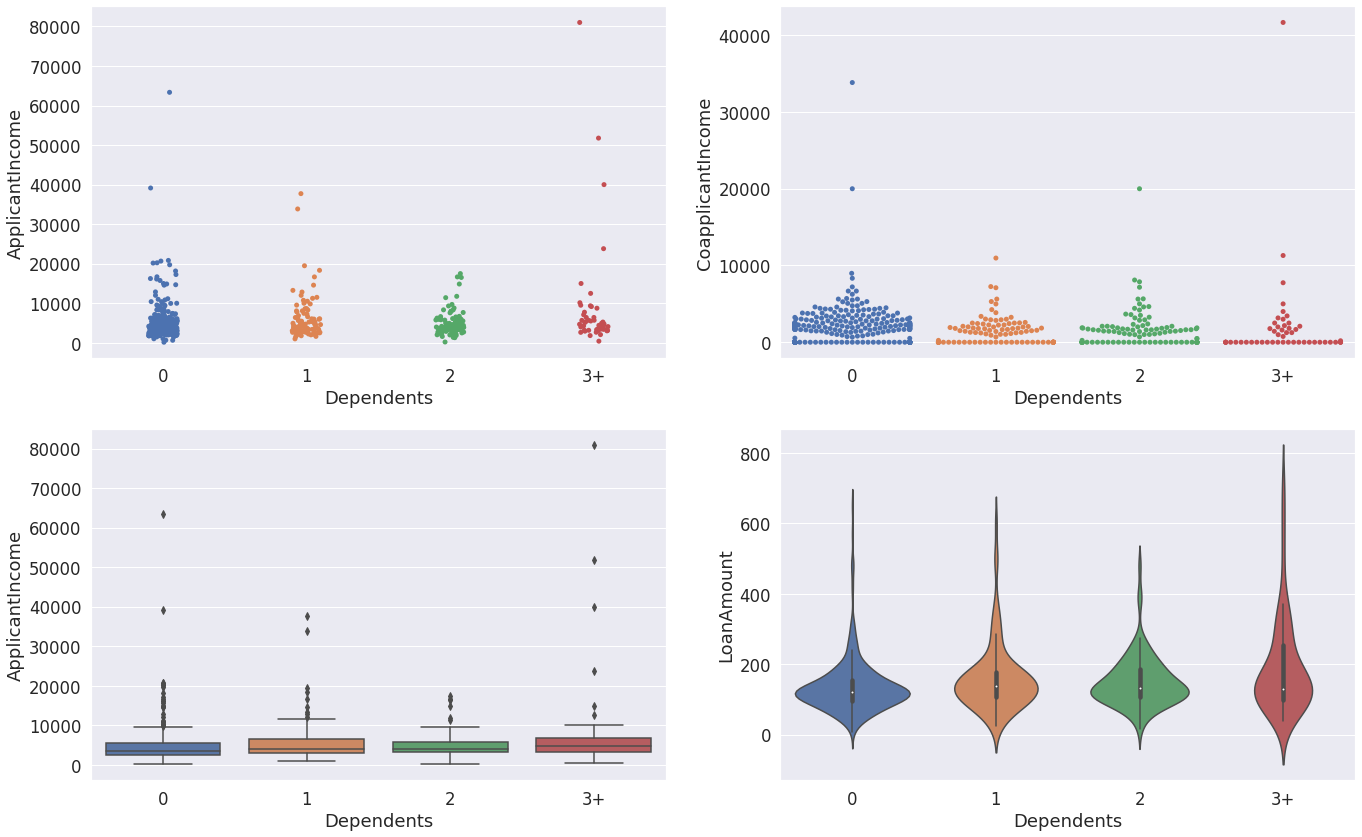

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Dependents'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Dependents'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Dependents'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Dependents'],y=df['LoanAmount'])

([<matplotlib.patches.Wedge at 0x7f3efac596d0>,
 [Text(-0.8514262161117528, 0.6964721089301588, 'Graduate Applicants'),
  Text(0.8514262161117524, -0.6964721089301593, 'Non-Graduate Applicants')],
 [Text(-0.4644142996973196, 0.37989387759826837, '78.176'),
  Text(0.46441429969731945, -0.37989387759826865, '21.824')])

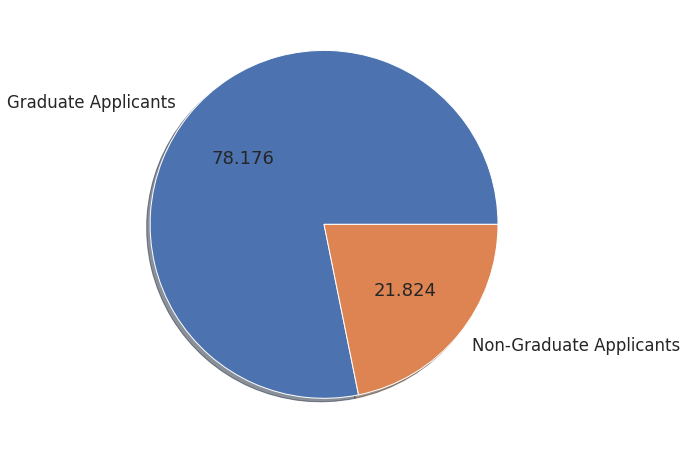

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Education'].value_counts(dropna=False),startangle=0,autopct='%.3f',labels=['Graduate Applicants','Non-Graduate Applicants'],shadow=True)

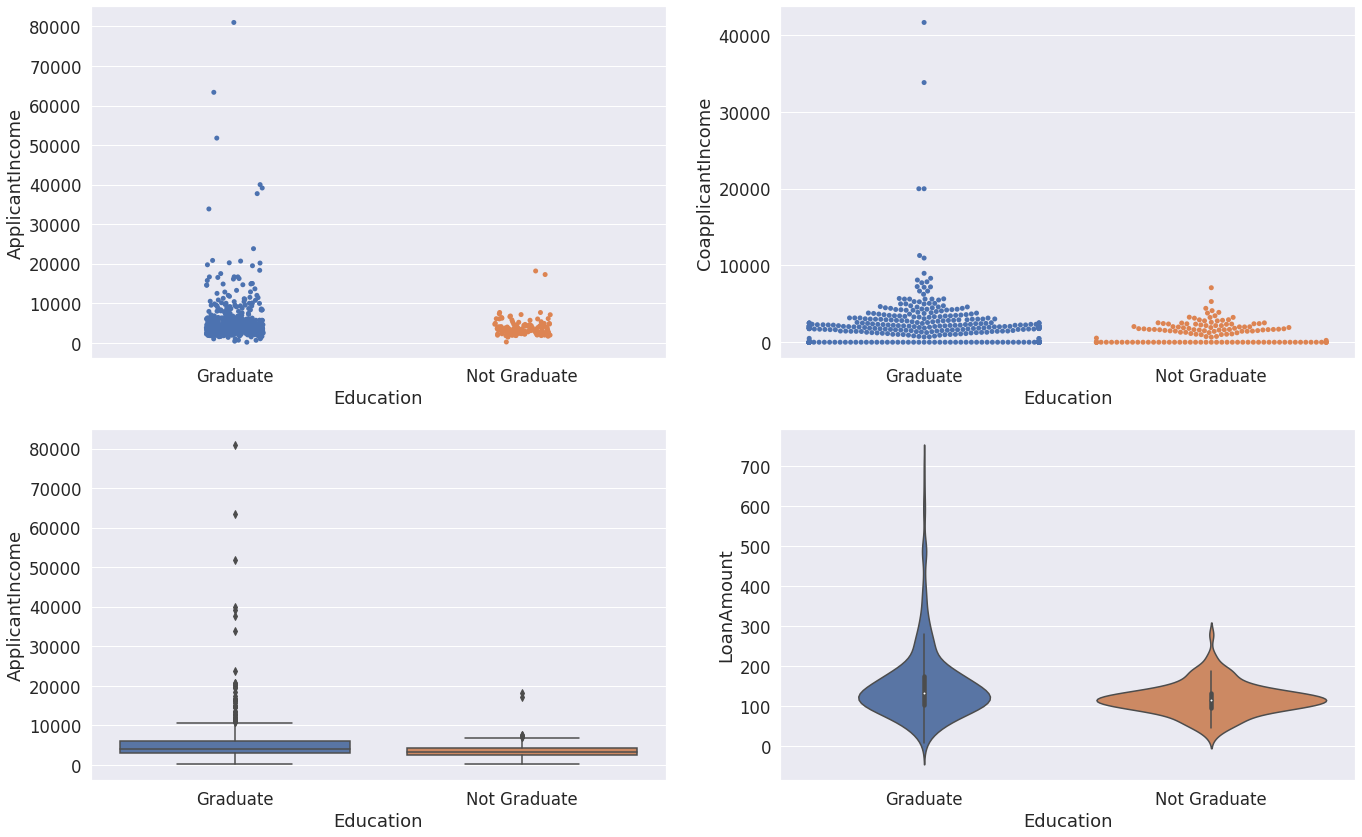

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Education'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Education'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Education'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Education'],y=df['LoanAmount'])

([<matplotlib.patches.Wedge at 0x7f3efaa30410>,
 [Text(-0.9181191561394509, 0.6058524697727844, 'Self Employed Applicants'),
  Text(0.8070858660351158, -0.7474037763126083, 'Non Self Employed Applicants'),
  Text(1.085288563964543, -0.17930067743257497, 'Null (Missing Data)')],
 [Text(-0.500792266985155, 0.3304649835124278, '81.433'),
  Text(0.4402286542009722, -0.40767478707960453, '13.355'),
  Text(0.5919755803442961, -0.09780036950867724, '5.212')])

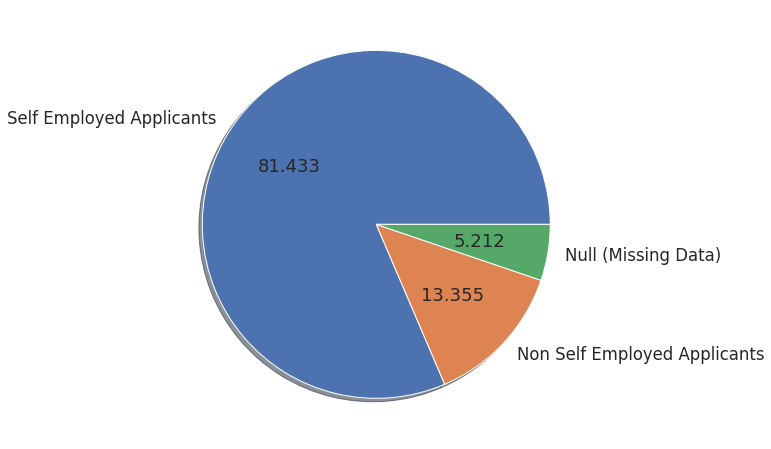

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Self_Employed'].value_counts(dropna=False),startangle=0,autopct='%.3f',labels=['Self Employed Applicants','Non Self Employed Applicants','Null (Missing Data)'],shadow=True)

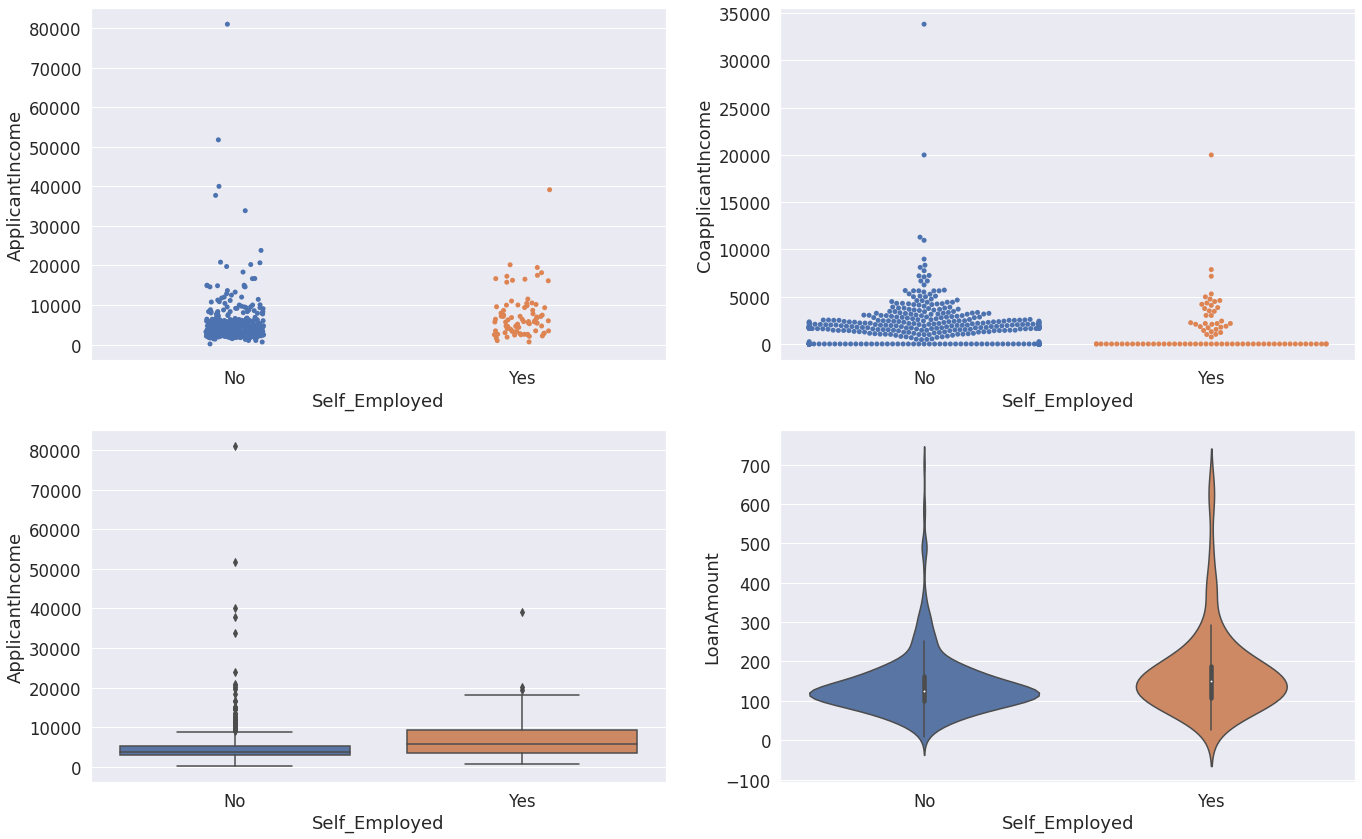

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Self_Employed'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Self_Employed'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Self_Employed'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Self_Employed'],y=df['LoanAmount'])

In [ ]:
df['Property_Area'].value_counts(dropna=False)

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

([<matplotlib.patches.Wedge at 0x7f3efa4c5250>,
 [Text(0.40661098511372595, 1.0220897743275028, 'Semiurban Applicants'),
  Text(-1.0582795633383781, -0.3000739339235115, 'Urban Applicants'),
  Text(0.67000963198199, -0.8724030565348555, 'Rural Applicants')],
 [Text(0.22178781006203233, 0.5575035132695468, '37.948'),
  Text(-0.5772433981845698, -0.16367669123100625, '32.899'),
  Text(0.3654597992629036, -0.4758562126553757, '29.153')])

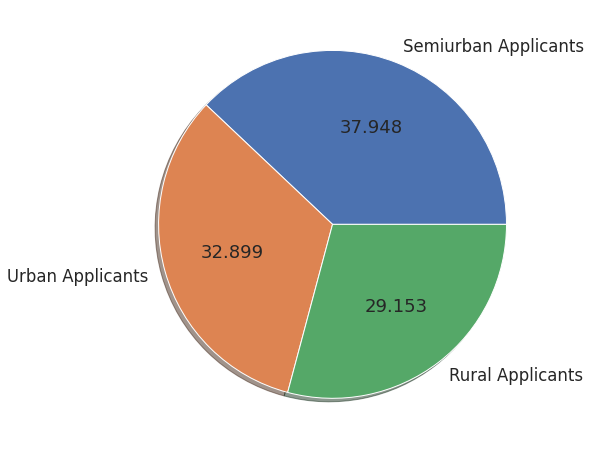

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Property_Area'].value_counts(dropna=False),startangle=0,autopct='%.3f',labels=['Semiurban Applicants','Urban Applicants','Rural Applicants'],shadow=True)

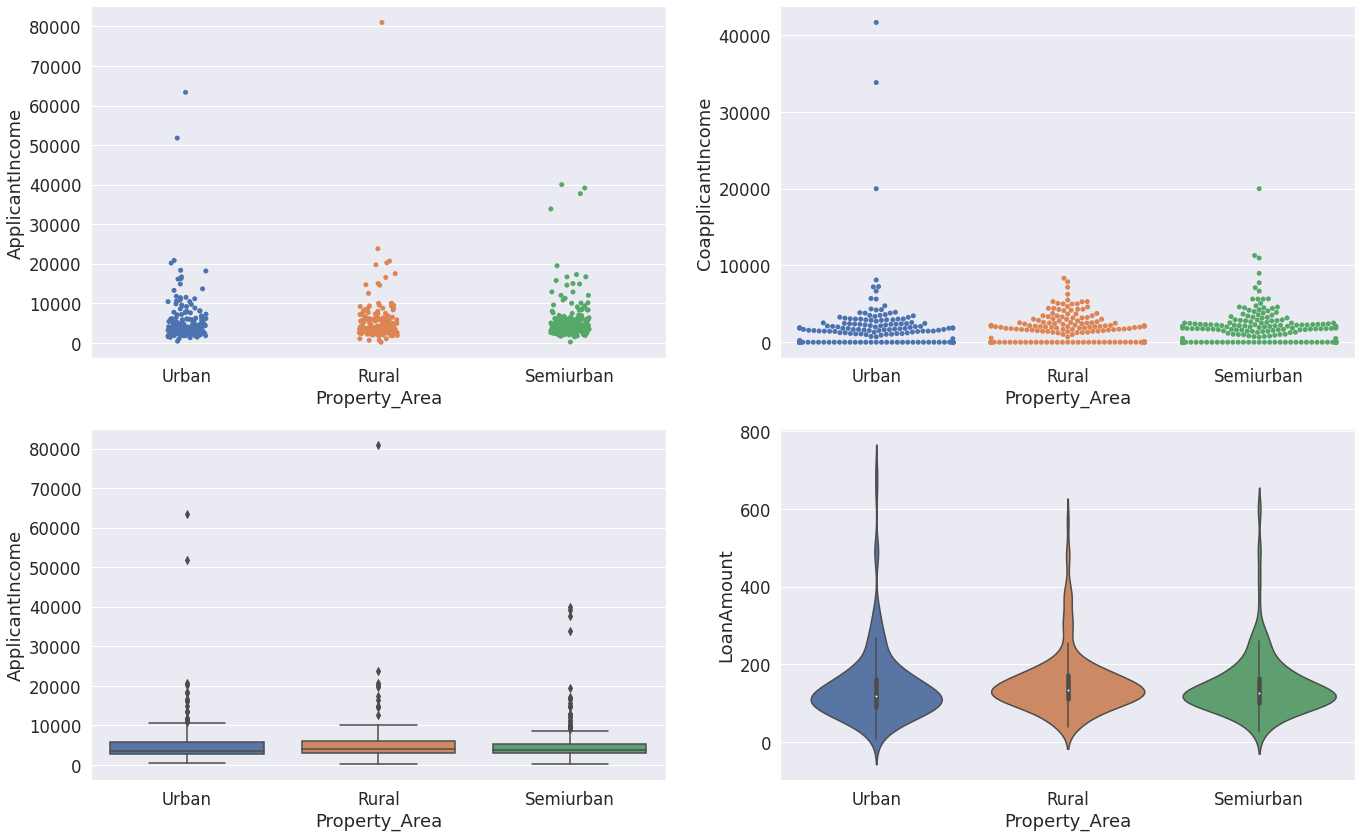

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Property_Area'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Property_Area'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Property_Area'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Property_Area'],y=df['LoanAmount'])

([<matplotlib.patches.Wedge at 0x7f3ef9d22c90>,
 [Text(-0.833331740138109, 0.7180238233362397, '1 = Applicants With Good Credit Score'),
  Text(0.6245149846349243, -0.9055280415130392, '0 = Applicants With Bad Credit Score'),
  Text(1.0641989815702162, -0.2783532425263176, 'Null (Missing Data)')],
 [Text(-0.45454458552987753, 0.3916493581834034, '77.362'),
  Text(0.340644537073595, -0.49392438627983953, '14.495'),
  Text(0.5804721717655724, -0.15182904137799139, '8.143')])

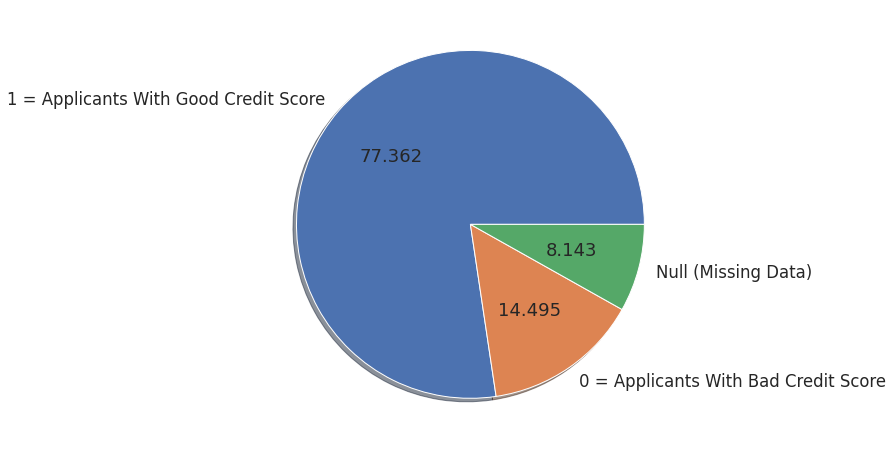

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Credit_History'].value_counts(dropna=False),startangle=0,autopct='%.3f',
        labels=['1 = Applicants With Good Credit Score','0 = Applicants With Bad Credit Score','Null (Missing Data)'],shadow=True)

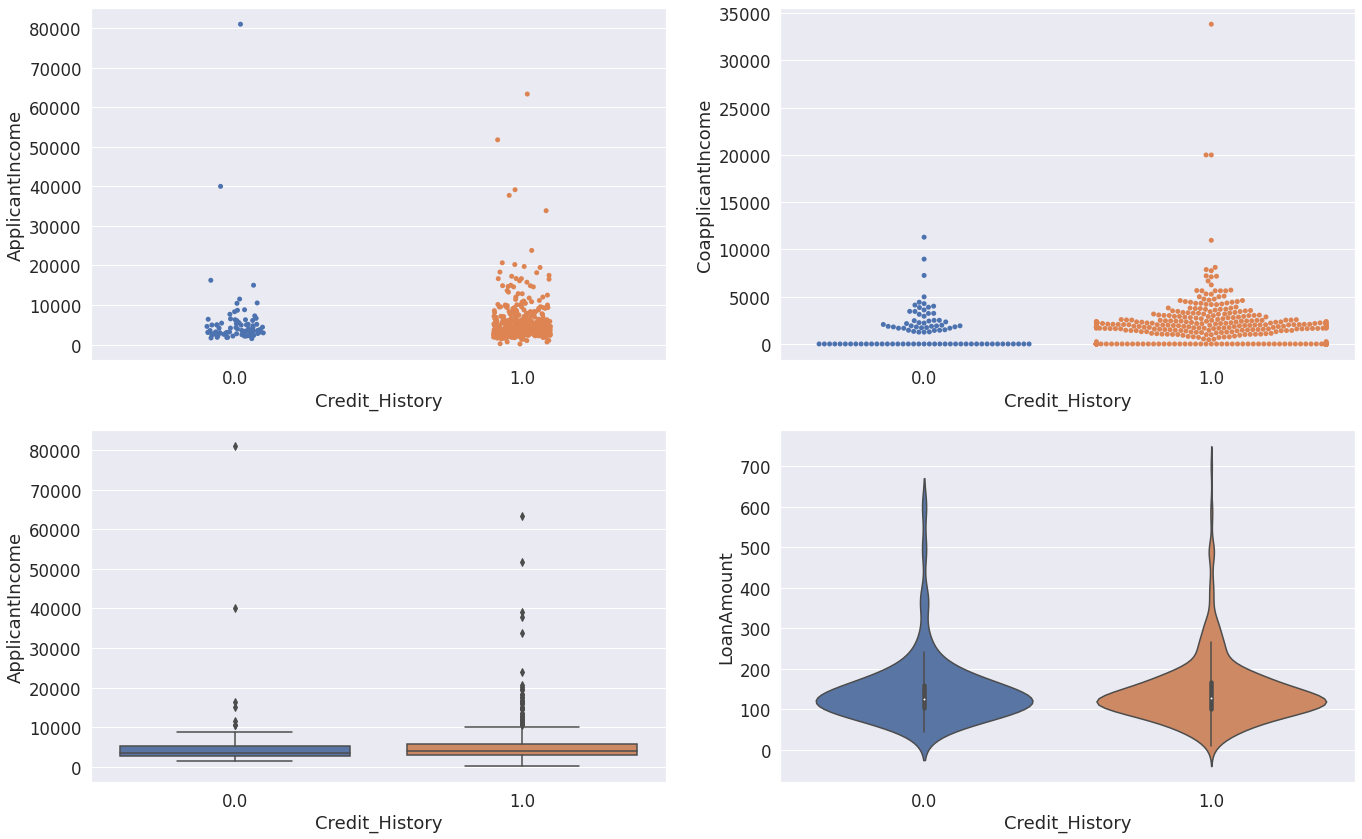

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Credit_History'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Credit_History'],y=df['CoapplicantIncome'])
plt.subplot(334)
sns.boxplot(x=df['Credit_History'],y=df['ApplicantIncome'])
plt.subplot(335)
sns.violinplot(x=df['Credit_History'],y=df['LoanAmount'])

([<matplotlib.patches.Wedge at 0x7f3ef9969590>,
 [Text(-0.6105420895241798, 0.9150072988339757, 'Approved Applicants For The Loan'),
  Text(0.6105420038550106, -0.9150073559970479, 'Declined Applicants For The Loan')],
 [Text(-0.33302295792227987, 0.4990948902730776, '68.730'),
  Text(0.3330229111936421, -0.49909492145293516, '31.270')])

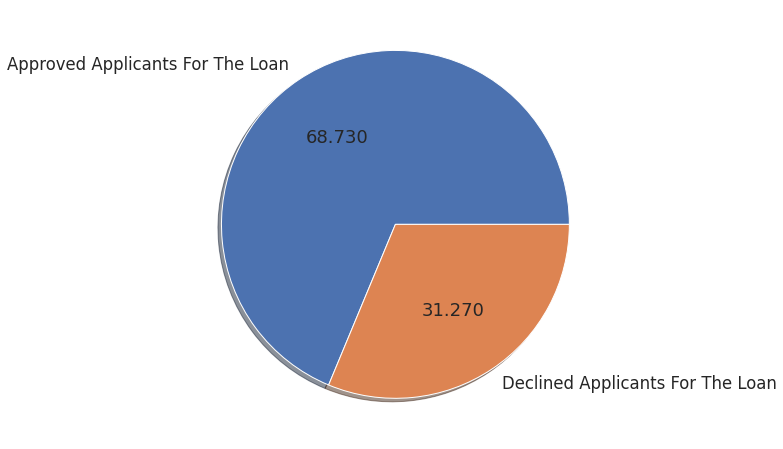

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(df['Loan_Status'].value_counts(dropna=False),startangle=0,autopct='%.3f',
        labels=['Approved Applicants For The Loan','Declined Applicants For The Loan'],shadow=True)

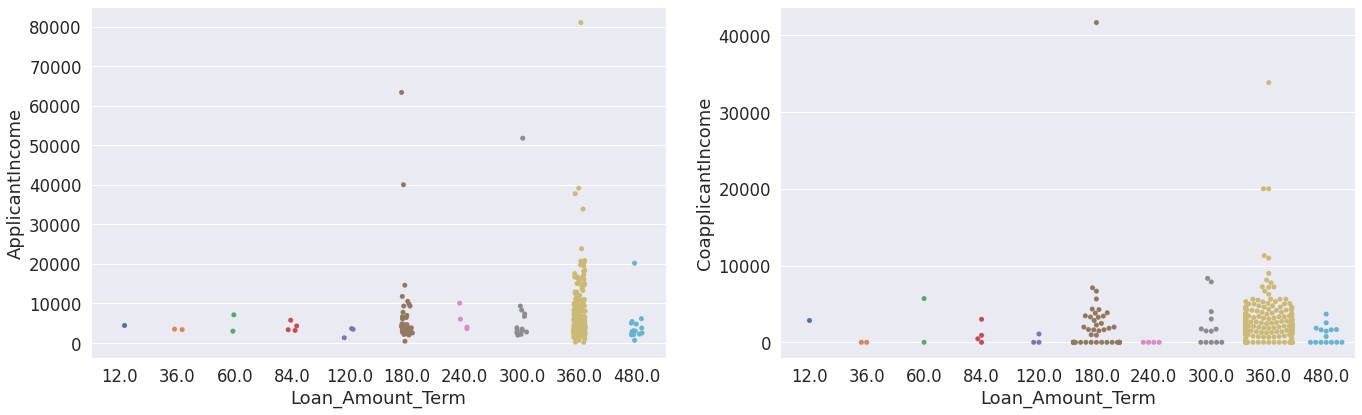

In [ ]:
plt.figure(figsize = (35, 22))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.stripplot(x=df['Loan_Amount_Term'],y=df['ApplicantIncome'])
plt.subplot(332)
sns.swarmplot(x=df['Loan_Amount_Term'],y=df['CoapplicantIncome'])

In [ ]:
df.Loan_Amount_Term.value_counts(ascending=False, normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

## Quantitative Variable Analysis:


In [ ]:
# Initiation of a new attribute
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Total_Income']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Total_Income
count,614.000000,614.000000,592.000000,614.000000
mean,5403.459283,1621.245798,146.412162,7024.705081
std,6109.041673,2926.248369,85.587325,6458.663872
min,150.000000,0.000000,9.000000,1442.000000
25%,2877.500000,0.000000,100.000000,4166.000000
50%,3812.500000,1188.500000,128.000000,5416.500000
75%,5795.000000,2297.250000,168.000000,7521.750000
max,81000.000000,41667.000000,700.000000,81000.000000


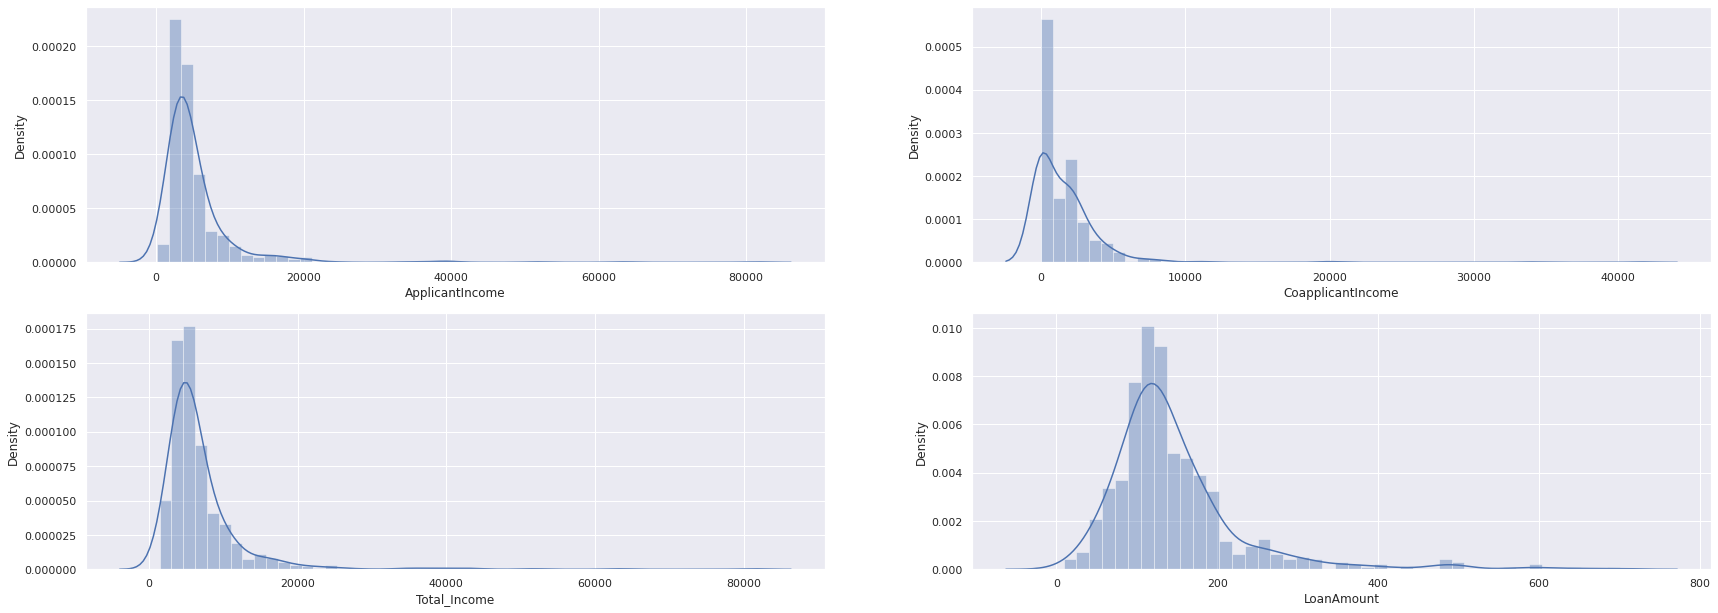

In [ ]:
plt.figure(figsize = (45, 16))
sns.set(font_scale = 1)
plt.subplot(331)
sns.distplot(df['ApplicantIncome'])
plt.subplot(332)
sns.distplot(df['CoapplicantIncome'])
plt.subplot(334)
sns.distplot(df['Total_Income'])
plt.subplot(335)
sns.distplot(df['LoanAmount'])

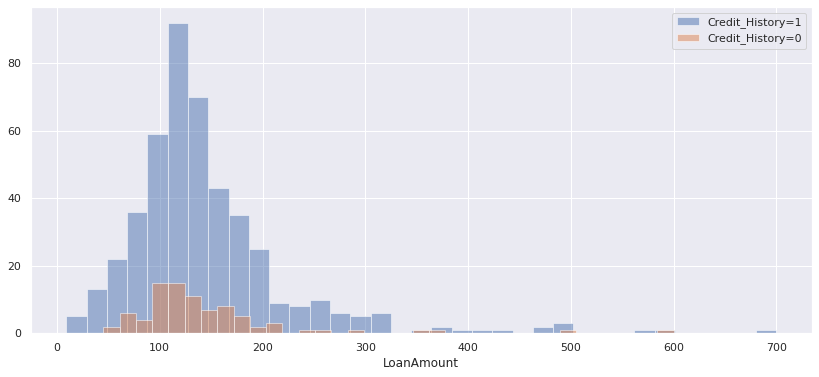

In [ ]:
plt.figure(figsize=(14,6))
df[df['Credit_History']==1]['LoanAmount'].hist(bins=35,alpha=0.5,label='Credit_History=1')
df[df['Credit_History']==0]['LoanAmount'].hist(bins=35,alpha=0.5,label='Credit_History=0')
plt.xlabel('LoanAmount')
plt.legend()

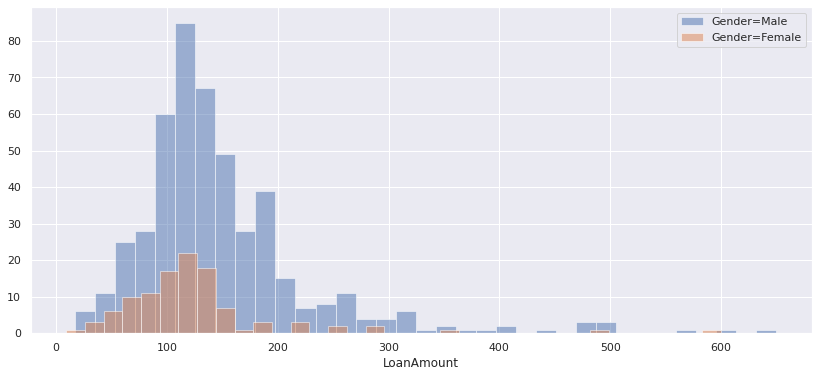

In [ ]:
plt.figure(figsize=(14,6))
df[df['Gender']=='Male']['LoanAmount'].hist(bins=35,alpha=0.5,label='Gender=Male')
df[df['Gender']=='Female']['LoanAmount'].hist(bins=35,alpha=0.5,label='Gender=Female')
plt.xlabel('LoanAmount')
plt.legend()

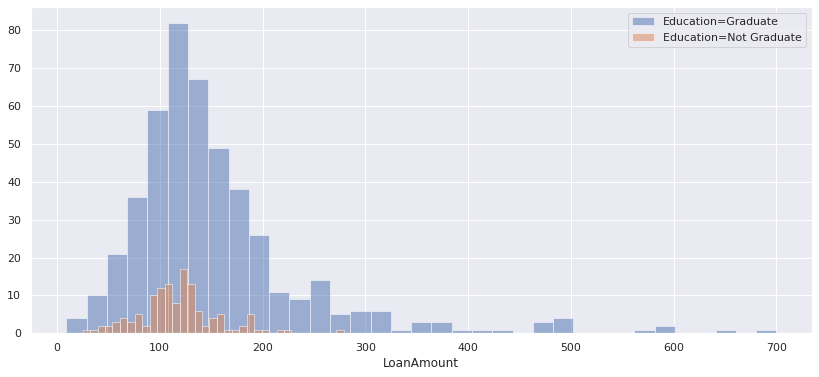

In [ ]:
plt.figure(figsize=(14,6))
df[df['Education']=='Graduate']['LoanAmount'].hist(bins=35,alpha=0.5,label='Education=Graduate')
df[df['Education']=='Not Graduate']['LoanAmount'].hist(bins=35,alpha=0.5,label='Education=Not Graduate')
plt.xlabel('LoanAmount')
plt.legend()

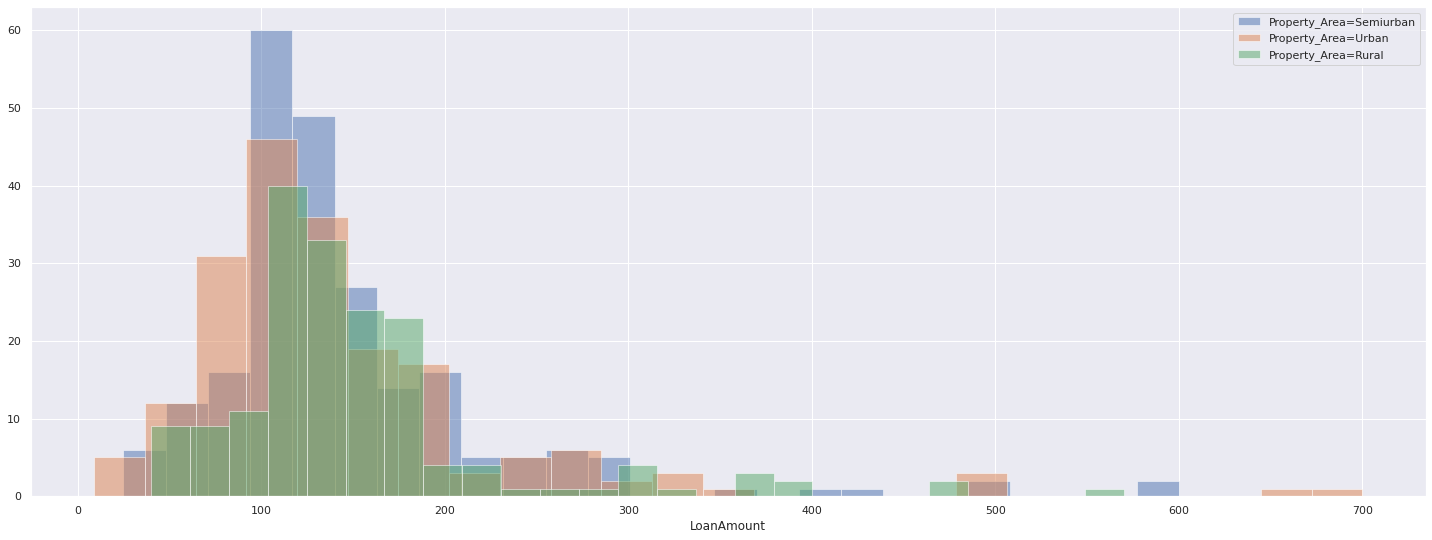

In [ ]:
plt.figure(figsize=(25,9))
df[df['Property_Area']=='Semiurban']['LoanAmount'].hist(bins=25,alpha=0.5,label='Property_Area=Semiurban')
df[df['Property_Area']=='Urban']['LoanAmount'].hist(bins=25,alpha=0.5,label='Property_Area=Urban')
df[df['Property_Area']=='Rural']['LoanAmount'].hist(bins=25,alpha=0.5,label='Property_Area=Rural')
plt.xlabel('LoanAmount')
plt.legend()

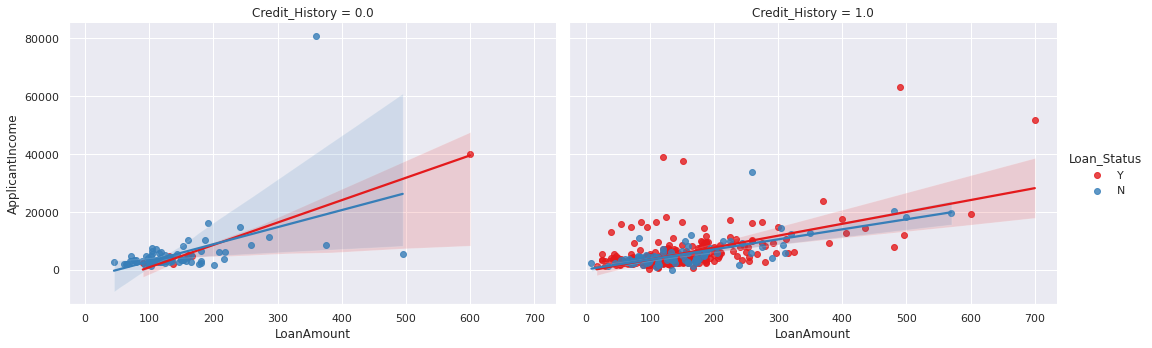

In [ ]:
sns.lmplot(x='LoanAmount',y='ApplicantIncome',data=df,col='Credit_History',hue='Loan_Status',palette='Set1', height=8, aspect=1.5, size=5)

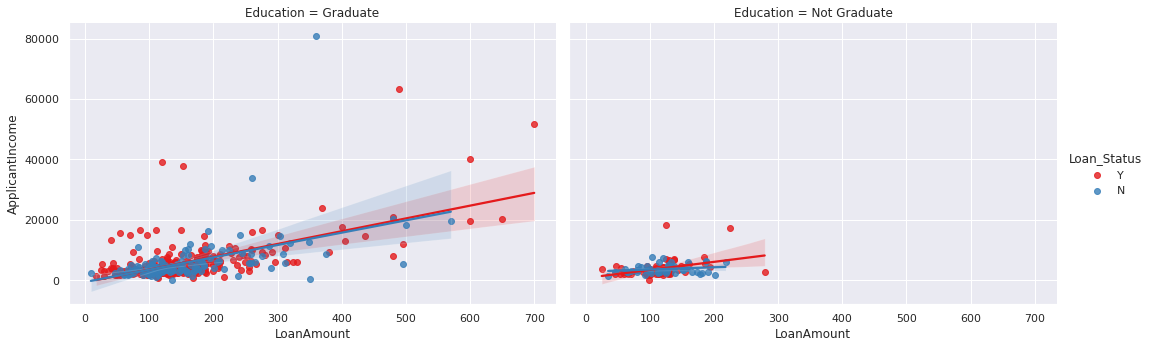

In [ ]:
sns.lmplot(x='LoanAmount',y='ApplicantIncome',data=df,col='Education',hue='Loan_Status',palette='Set1', height=8, aspect=1.5, size=5)

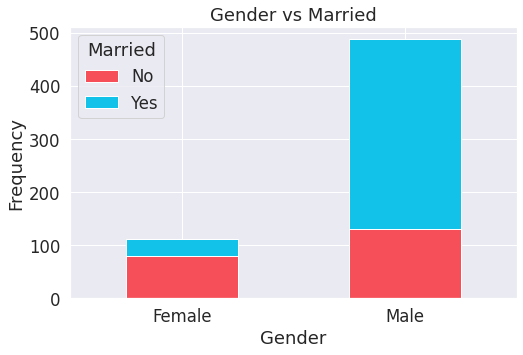

In [ ]:
pd.crosstab(df.Gender,df.Married).plot(kind="bar", stacked=True, figsize=(8,5), color=['#f64f59','#12c2e9'])
plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In comparison to female candidates, the majority of male applicants are already married. In addition, the number of unmarried male applicants is larger than the number of unmarried female candidates due to there being many more male applicants in general.

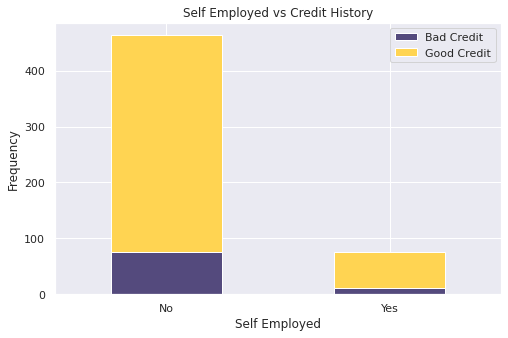

In [ ]:
pd.crosstab(df.Self_Employed,df.Credit_History).plot(kind="bar", stacked=True, figsize=(8,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

In comparison to self-employed candidates, the majority of non-self-employed applicants have good credit. This may represent the risky nature of working for yourself, where income instability is a great factor on average.

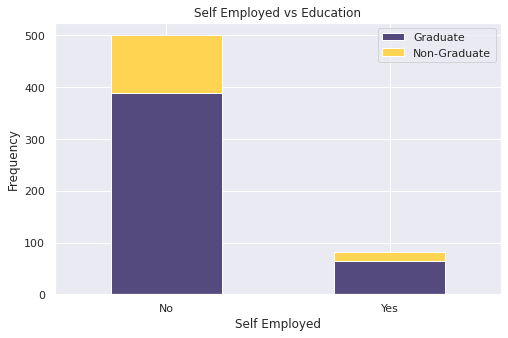

In [ ]:
pd.crosstab(df.Self_Employed,df.Education).plot(kind="bar", stacked=True, figsize=(8,5), color=['#544a7d','#ffd452'])
plt.title('Self Employed vs Education')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Graduate", "Non-Graduate"])
plt.xticks(rotation=0)
plt.show()

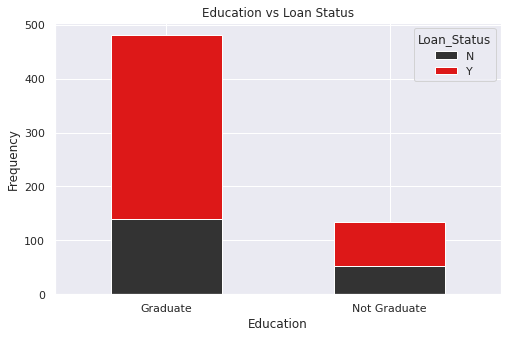

In [ ]:
pd.crosstab(df.Education,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(8,5), color=['#333333','#dd1818'])
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

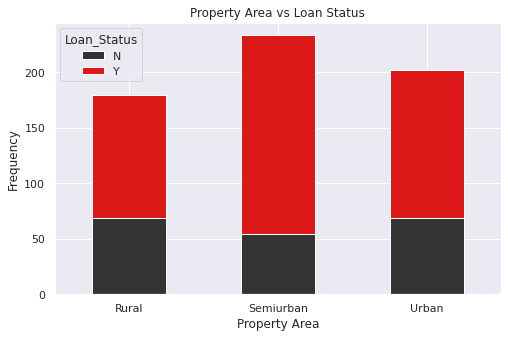

In [ ]:
pd.crosstab(df.Property_Area,df.Loan_Status).plot(kind="bar", stacked=True, figsize=(8,5), color=['#333333','#dd1818'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

##**PREPROCESSING THE DATA**

In [ ]:
# Checking if there are any duplicates in our data set
df.duplicated().any()

False

In [ ]:
# Checking for null values in our data set
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [ ]:
# Checking how much data is missing from each column
(1 - (df.isnull().sum() / df.shape[0])) * 100

Loan_ID              100.000000
Gender                97.882736
Married               99.511401
Dependents            97.557003
Education            100.000000
Self_Employed         94.788274
ApplicantIncome      100.000000
CoapplicantIncome    100.000000
LoanAmount            96.416938
Loan_Amount_Term      97.719870
Credit_History        91.856678
Property_Area        100.000000
Loan_Status          100.000000
Total_Income         100.000000
dtype: float64

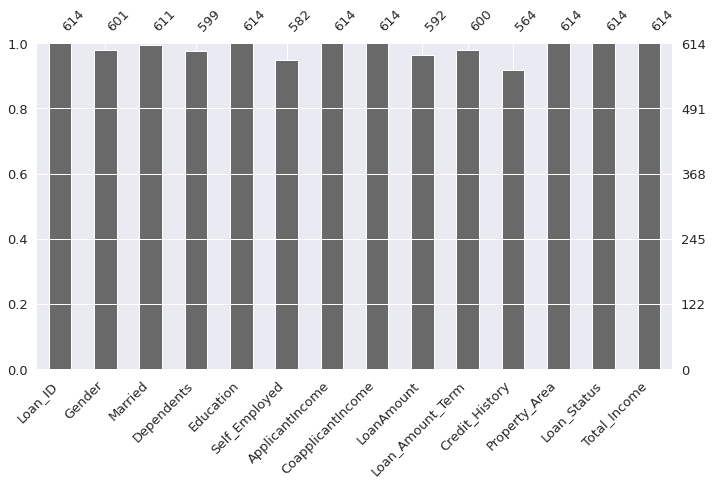

In [ ]:
# Getting a visual of how much data is missing
plt.figure(figsize = (25, 6))
lml = plt.subplot(1,2,2)
mso.bar(df, ax = lml, fontsize = 13);

In [ ]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
# Replacing '3+' dependents to numerical form 
df = df.replace(to_replace='3+',value=4)
df.Dependents.value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [ ]:
# Imputation of data A: filling the missing values for categorical terms using mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [ ]:
# Label Encoding 
df.replace({'Gender':{'Female':0,'Male':1},
            'Married':{'No':0,'Yes':1},
            'Education':{'Not Graduate':0,'Graduate':1},
            'Self_Employed':{'No':0,'Yes':1},
            'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
            'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,1,0,0,1,0,5849,0.0,NaN,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [ ]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296,7024.705081
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.248369,85.587325,64.428629,0.352339,0.787482,0.463973,6458.663872
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000,1442.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,4166.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000,2.000000,1.000000,7521.750000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000,81000.000000


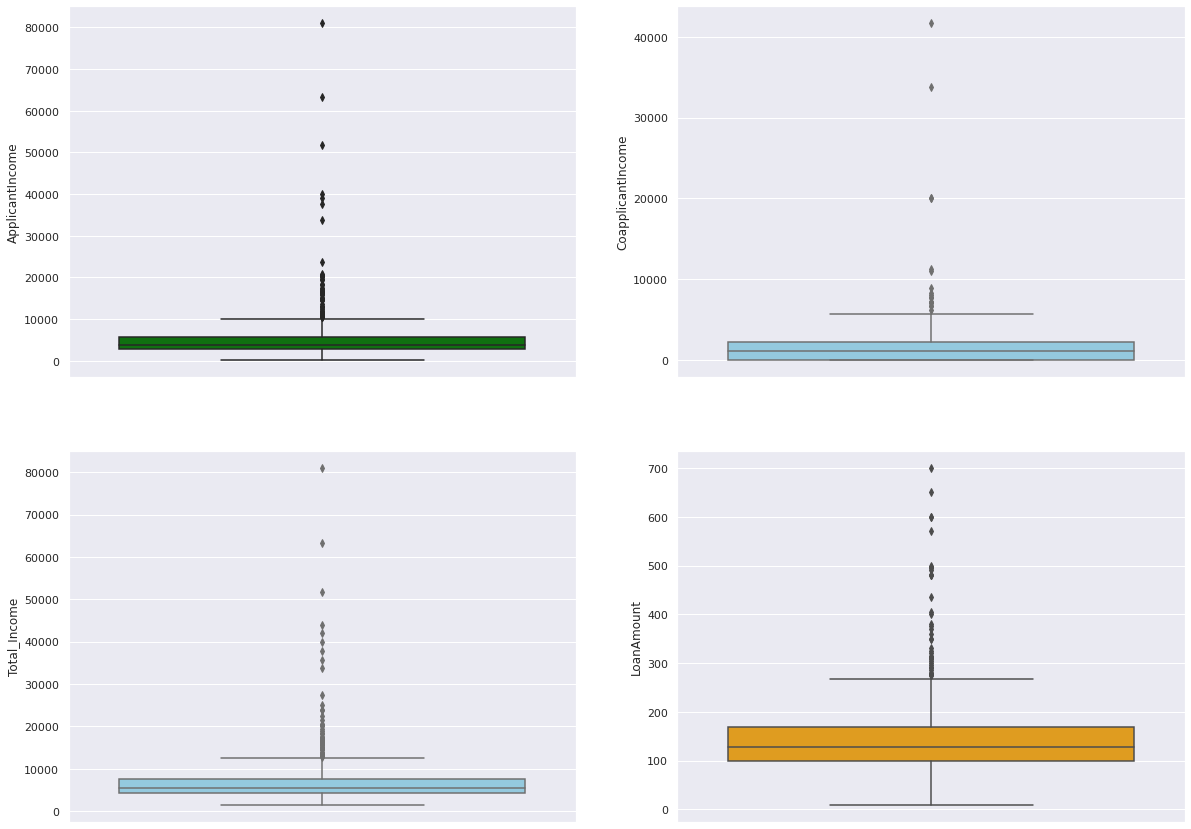

In [ ]:
# Box plot before dropping the outliers
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="Total_Income", ax=axs1[1, 0], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 1], color='orange');

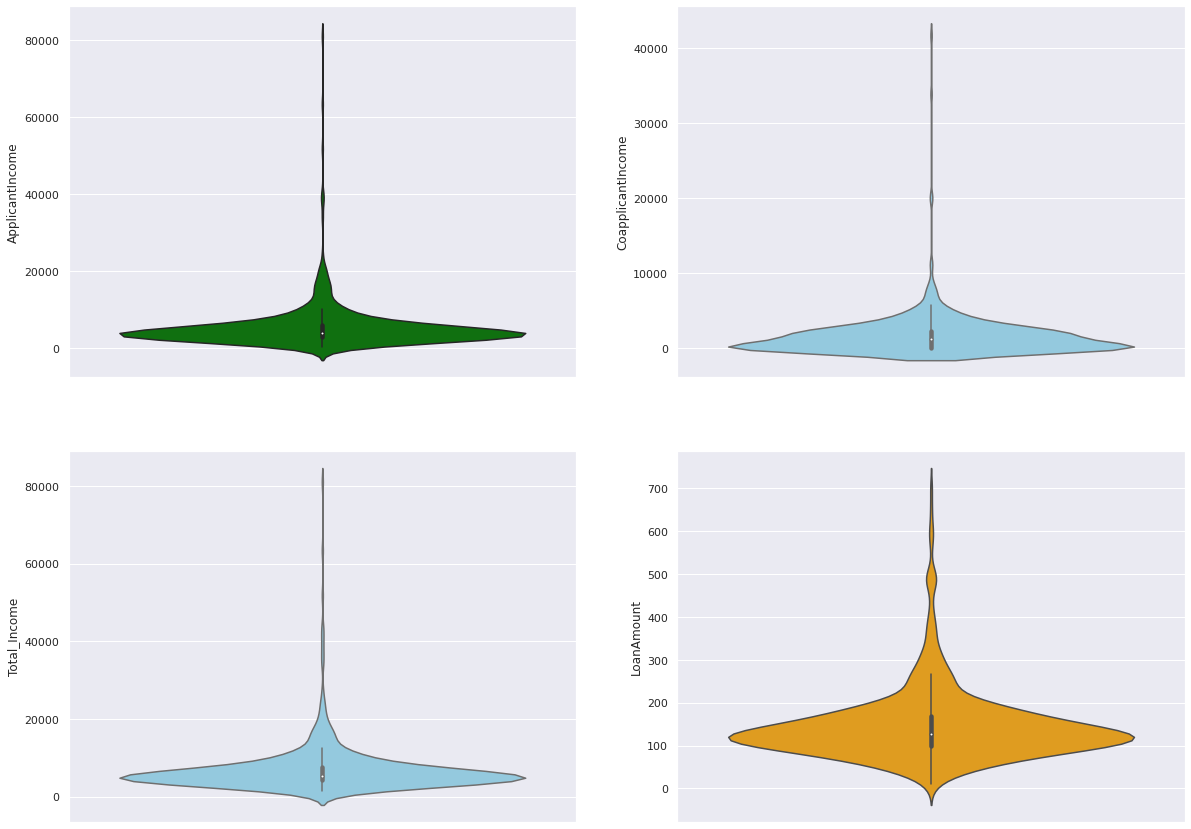

In [ ]:
# Violin plot before dropping the outliers
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(20, 15))
sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="Total_Income", ax=axs1[1, 0], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 1], color='orange');

In [ ]:
# Skewness Treatment
df.ApplicantIncome = df.ApplicantIncome.loc[(df.ApplicantIncome < df.ApplicantIncome.quantile(0.90)) & 
                                            (df.ApplicantIncome > df.ApplicantIncome.quantile(0.10))]

df.CoapplicantIncome = df.CoapplicantIncome.loc[(df.CoapplicantIncome < df.CoapplicantIncome.quantile(0.90)) & 
                                            (df.CoapplicantIncome > df.CoapplicantIncome.quantile(0.10))]

df.LoanAmount = df.LoanAmount.loc[(df.LoanAmount < df.LoanAmount.quantile(0.90)) & 
                                            (df.LoanAmount > df.LoanAmount.quantile(0.10))]    

df.Total_Income = df.Total_Income.loc[(df.Total_Income < df.Total_Income.quantile(0.90)) & 
                                            (df.Total_Income > df.Total_Income.quantile(0.10))]

In [ ]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,614.000000,614.000000,614.000000,614.000000,490.000000,279.000000,471.000000,614.000000,614.000000,614.000000,614.000000,490.000000
mean,0.817590,0.653094,0.781759,0.133550,4285.663265,2022.899355,133.188960,342.410423,0.855049,1.037459,0.687296,5852.911837
std,0.386497,0.476373,0.413389,0.340446,1645.780837,757.744197,35.171984,64.428629,0.352339,0.787482,0.463973,1934.010619
min,0.000000,0.000000,0.000000,0.000000,2221.000000,16.120001,72.000000,12.000000,0.000000,0.000000,0.000000,3250.000000
25%,1.000000,0.000000,1.000000,0.000000,3054.500000,1534.000000,108.000000,360.000000,1.000000,0.000000,0.000000,4404.250000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1983.000000,128.000000,360.000000,1.000000,1.000000,1.000000,5416.500000
75%,1.000000,1.000000,1.000000,0.000000,5180.500000,2483.000000,158.000000,360.000000,1.000000,2.000000,1.000000,6784.000000
max,1.000000,1.000000,1.000000,1.000000,9357.000000,3750.000000,234.000000,480.000000,1.000000,2.000000,1.000000,11376.000000


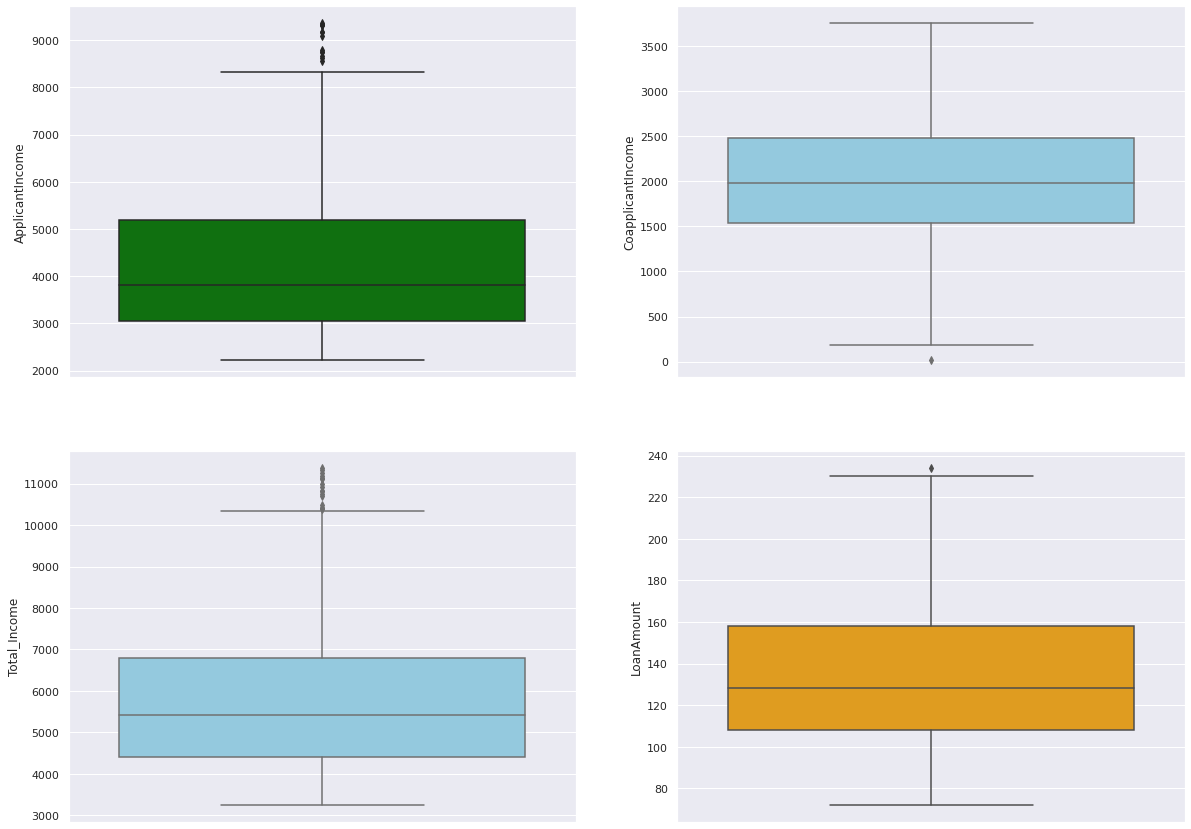

In [ ]:
# Box plot after dropping the outliers
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(20, 15))
sns.boxplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.boxplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.boxplot(data=df, y="Total_Income", ax=axs1[1, 0], color='skyblue')
sns.boxplot(data=df, y="LoanAmount", ax=axs1[1, 1], color='orange');

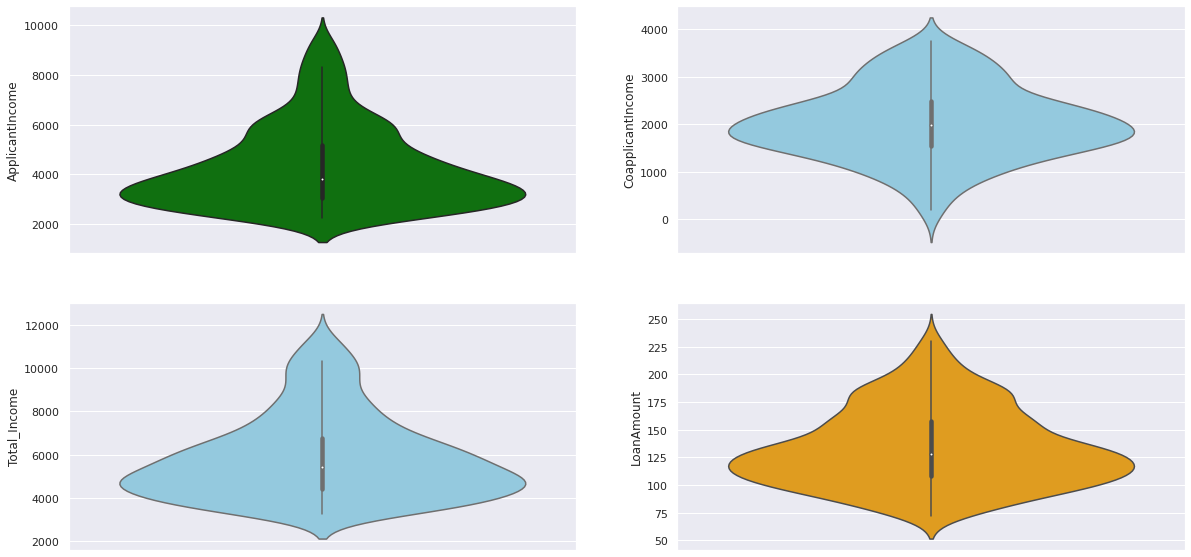

In [ ]:
# Violin plot after dropping the outliers
sns.set(style="darkgrid")
fig, axs1 = plt.subplots(2, 2, figsize=(20, 10))
sns.violinplot(data=df, y="ApplicantIncome", ax=axs1[0, 0], color='green')
sns.violinplot(data=df, y="CoapplicantIncome", ax=axs1[0, 1], color='skyblue')
sns.violinplot(data=df, y="Total_Income", ax=axs1[1, 0], color='skyblue')
sns.violinplot(data=df, y="LoanAmount", ax=axs1[1, 1], color='orange');

In [ ]:
df.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome      124
CoapplicantIncome    335
LoanAmount           143
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Total_Income         124
dtype: int64

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

## Correlation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced pattern recognition techniques.


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

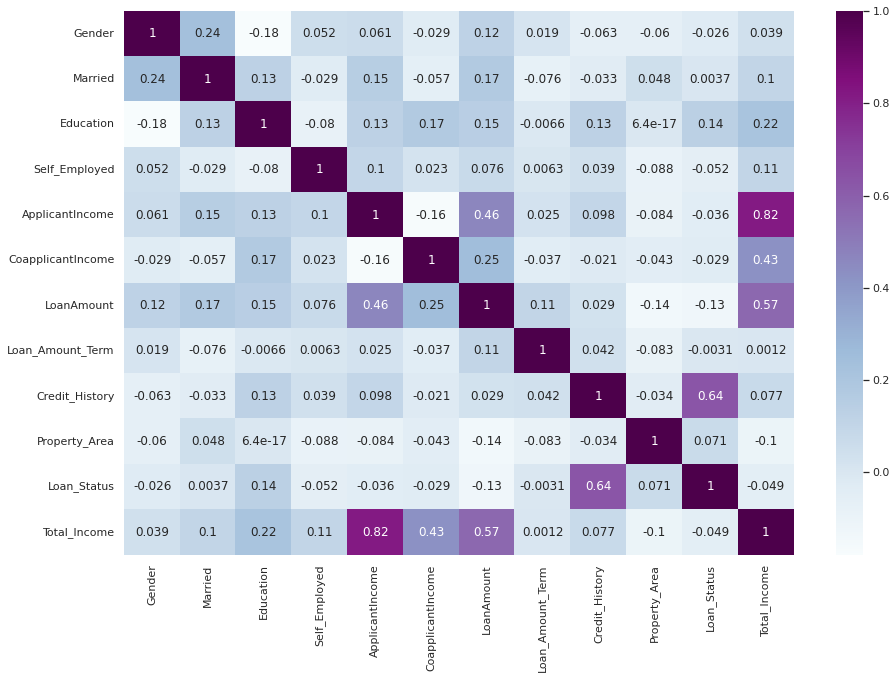

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuPu")

In [ ]:
# Correlation Table
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
Gender,1.00,0.24,-0.18,0.05,0.06,-0.03,0.12,0.02,-0.06,-0.06,-0.03,0.04
Married,0.24,1.00,0.13,-0.03,0.15,-0.06,0.17,-0.08,-0.03,0.05,0.00,0.10
Education,-0.18,0.13,1.00,-0.08,0.13,0.17,0.15,-0.01,0.13,0.00,0.14,0.22
Self_Employed,0.05,-0.03,-0.08,1.00,0.10,0.02,0.08,0.01,0.04,-0.09,-0.05,0.11
ApplicantIncome,0.06,0.15,0.13,0.10,1.00,-0.16,0.46,0.02,0.10,-0.08,-0.04,0.82
CoapplicantIncome,-0.03,-0.06,0.17,0.02,-0.16,1.00,0.25,-0.04,-0.02,-0.04,-0.03,0.43
LoanAmount,0.12,0.17,0.15,0.08,0.46,0.25,1.00,0.11,0.03,-0.14,-0.13,0.57
Loan_Amount_Term,0.02,-0.08,-0.01,0.01,0.02,-0.04,0.11,1.00,0.04,-0.08,-0.00,0.00
Credit_History,-0.06,-0.03,0.13,0.04,0.10,-0.02,0.03,0.04,1.00,-0.03,0.64,0.08
Property_Area,-0.06,0.05,0.00,-0.09,-0.08,-0.04,-0.14,-0.08,-0.03,1.00,0.07,-0.10


### **FEATURE SEPARATION**

In [ ]:
# The dependent feature (Loan_Status) will be seperated from the independent features.
X = df.drop(["Loan_Status", "Loan_ID"], axis=1)
y = df["Loan_Status"]

Our analysis revealed that the ratio of approved to denied loans is unbalanced. To avoid overfitting, an oversampling technique will be used in this section. SMOTE is a data augmentation method we will use that will generate synthetic data points depending on the original data points. SMOTE can be viewed as an enhanced variant of oversampling or as a specialized data augmentation algorithm.

In [ ]:
X, y = SMOTE().fit_resample(X, y)

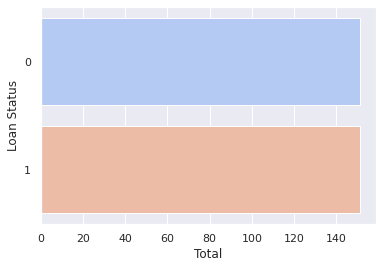

In [ ]:
# Now the loan status distribution is going to be balanced
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

In [ ]:
# Data Normalization 
X = MinMaxScaler().fit_transform(X)

In [ ]:
# Dividing the data into train (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Logistic Regression


In [ ]:
LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.84      0.96      0.90        27

    accuracy                           0.90        61
   macro avg       0.90      0.91      0.90        61
weighted avg       0.91      0.90      0.90        61

[[29  5]
 [ 1 26]]
LR accuracy: 90.16%


## K-Nearest Neighbour (KNN)

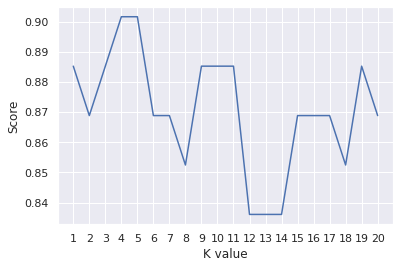

KNN best accuracy: 90.16%


In [ ]:
scoreListknn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## Support Vector Machine (SVM)

In [ ]:
SVCclassifier = SVC(kernel='rbf', max_iter=500)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        34
           1       0.84      1.00      0.92        27

    accuracy                           0.92        61
   macro avg       0.92      0.93      0.92        61
weighted avg       0.93      0.92      0.92        61

[[29  5]
 [ 0 27]]
SVC accuracy: 91.80%


## Decision Tree

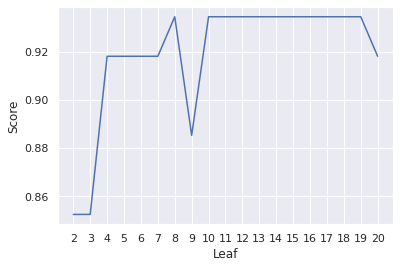

Decision Tree Accuracy: 93.44%


In [ ]:
scoreListDT = []
for i in range(2,21):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,21), scoreListDT)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

## Random Forest

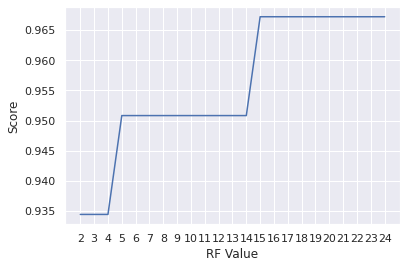

Random Forest Accuracy:  96.72%


In [ ]:
scoreListRF = []
for i in range(2,25):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,25), scoreListRF)
plt.xticks(np.arange(2,25,1))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

## Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'subsample':[0.5,1],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=20)
GB.fit(X_train, y_train)

GBclassifier = GradientBoostingClassifier(subsample=0.5, n_estimators=400, max_depth=4, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        34
           1       0.90      0.96      0.93        27

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

[[31  3]
 [ 1 26]]
Gradient Boosting accuracy: 93.44%


In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 
                                  'Decision Tree', 'Random Forest', 'Gradient Boost'], 
                        'Accuracy': [LRAcc*100, KNAcc*100, SVCAcc*100, 
                                     DTAcc*100, RFAcc*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
4,Random Forest,96.721311
3,Decision Tree,93.442623
5,Gradient Boost,93.442623
2,SVM,91.803279
0,Logistic Regression,90.163934
1,K Neighbors,90.163934
